In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from load import load

## Load data set

I droped all the rows that contains misssing calues. There are only 2140 images in the train data

In [2]:
X,y = load('./data/training.csv')
print('X.shape == {}; X.min == {:.3f}; X.max == {:.3f}'.format(
     X.shape, X.min(), X.max()))
print('y.shape == {}; y.min == {:.3f}; y.max == {:.3f}'.format(
     y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

Show some samples

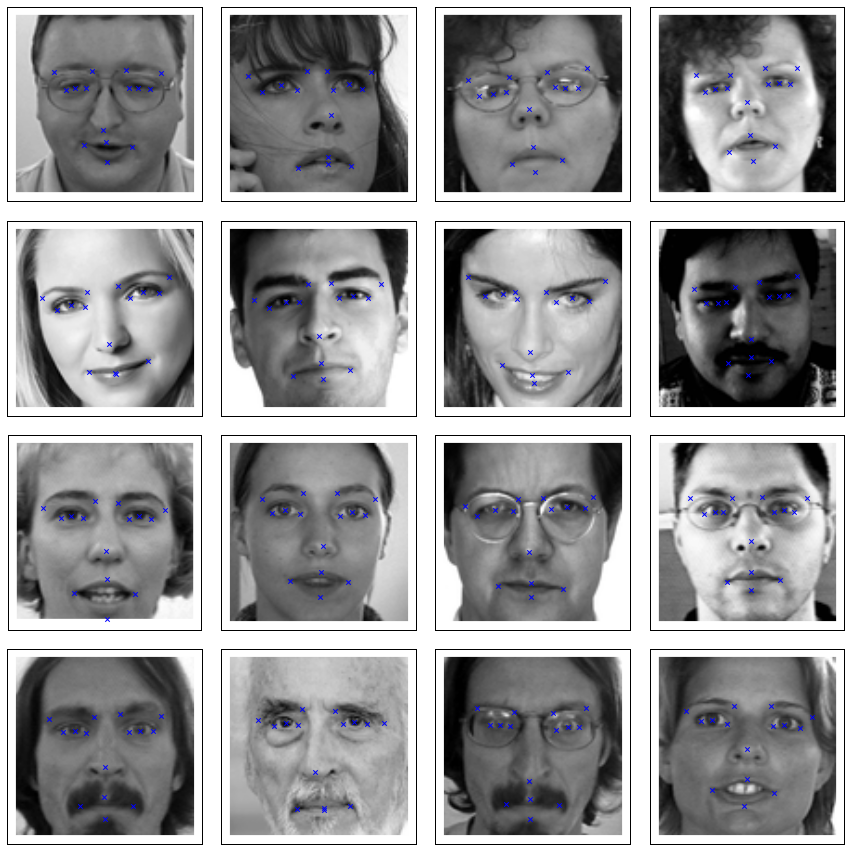

In [3]:
fig, axes = plt.subplots(4,4, figsize=(15,15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(96,96),cmap='gray')
    ax.scatter(y[i][0::2]*48+48, y[i][1::2]*48+48,marker='x',s=20)
    ax.set_xticks([])
    ax.set_yticks([])

# Model

Lenet5-style convolutional neural nets  
- **local connectivity**: neurons are connected only to a subset of neurons in the previous layer,
- **weight sharing**: weights are shared between a subset of neurons in the convolutional layer (these neurons form what's called a _feature map_),
- **pooling**: static subsampling of inputs.

<img src="./img/conv_1D_nn.png" />
<center>Illustration of local connectivity and weight sharing. (Taken from the [deeplearning.net tutorial](http://deeplearning.net/tutorial/lenet.html).)</center>

<img src="./img/Convolution_schematic.gif" />
<center>The convolution operation. (Animation taken from the [Stanford deep learning tutorial](http://deeplearning.stanford.edu/tutorial/).)</center>

Here, i use a convolutional neural net with three convolutional layers and two fully connected layers.  
Each conv layer is followed by a 2x2 max-pooling layer.  
Starting with 32 filters, and double the number of filters with every conv layer.  
The densely connected hidden layers both have 500 units.

In [4]:
from mycnn import build_model

model = build_model()


Using Theano backend.
Using gpu device 0: GeForce GT 540M (CNMeM is disabled, cuDNN not available)


In [5]:
from load import load_2d
X, y = load_2d('./data/training.csv')

In [6]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)
#history = model.fit(X, y, nb_epoch=200)
history = model.fit(X, y, nb_epoch=800, batch_size=32, validation_split=0.3, callbacks=[early_stop])

Train on 1498 samples, validate on 642 samples
Epoch 1/800
1498/1498 [==============================] - 13s - loss: 0.0248 - val_loss: 0.0083
Epoch 2/800
1498/1498 [==============================] - 13s - loss: 0.0067 - val_loss: 0.0064
Epoch 3/800
1498/1498 [==============================] - 14s - loss: 0.0056 - val_loss: 0.0058
Epoch 4/800
1498/1498 [==============================] - 16s - loss: 0.0051 - val_loss: 0.0055
Epoch 5/800
1498/1498 [==============================] - 17s - loss: 0.0049 - val_loss: 0.0053
Epoch 6/800
1498/1498 [==============================] - 18s - loss: 0.0047 - val_loss: 0.0051
Epoch 7/800
1498/1498 [==============================] - 18s - loss: 0.0045 - val_loss: 0.0050
Epoch 8/800
1498/1498 [==============================] - 19s - loss: 0.0044 - val_loss: 0.0049
Epoch 9/800
1498/1498 [==============================] - 20s - loss: 0.0043 - val_loss: 0.0048
Epoch 10/800
1498/1498 [==============================] - 20s - loss: 0.0042 - val_loss: 0.0047
Ep

In [7]:
json_string = model.to_json()
open('my_200_no_else.json','w').write(json_string)
model.save_weights('my_200_no_else.h5')

Show the performance of the model on the train data

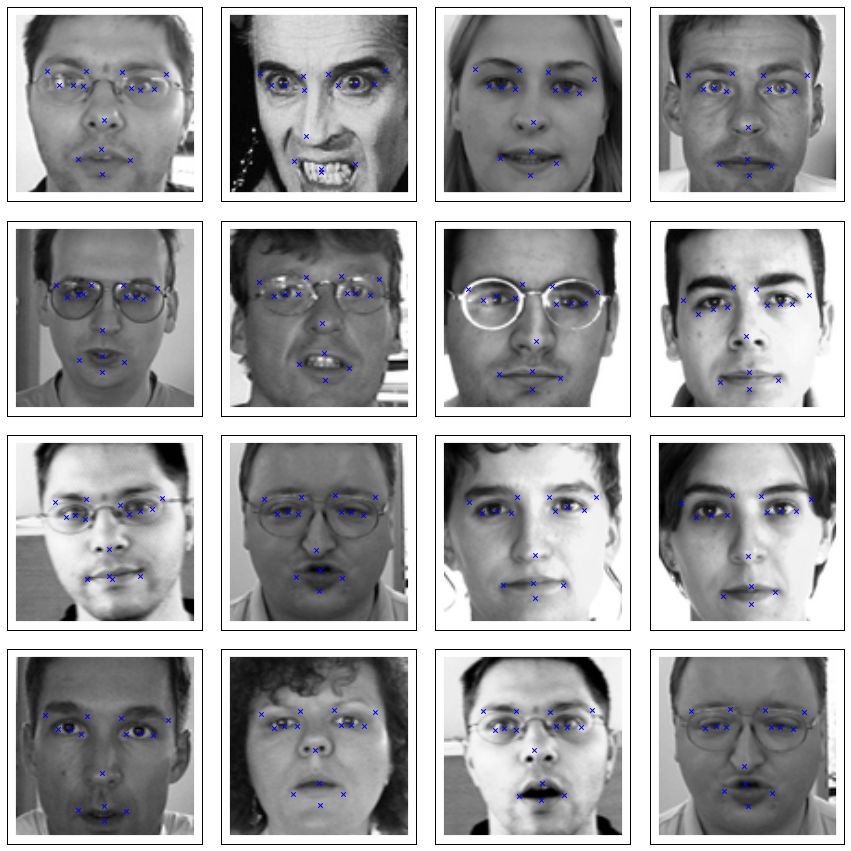

In [8]:
fig, axes = plt.subplots(4,4, figsize=(15,15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
y_pred = model.predict(X)
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(96,96),cmap='gray')
    ax.scatter(y_pred[i][0::2]*48+48, y_pred[i][1::2]*48+48,marker='x',s=20)
    ax.set_xticks([])
    ax.set_yticks([])

Show the performance of the model on the test data

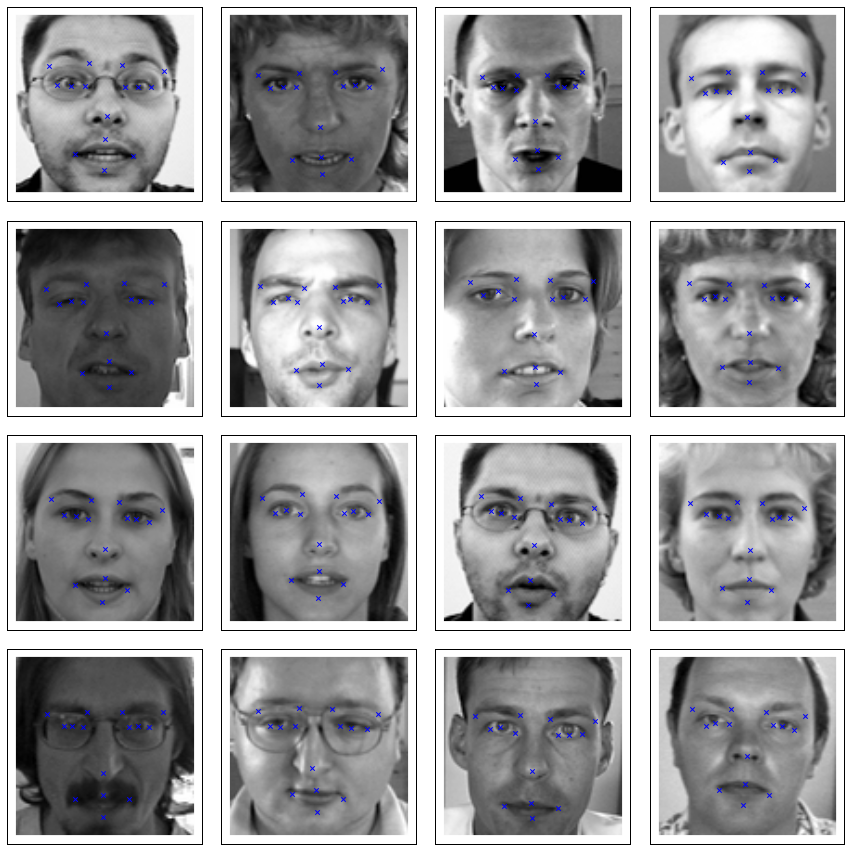

In [9]:
fig, axes = plt.subplots(4,4, figsize=(15,15))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
X_test, _ = load_2d('./data/test.csv')
y_pred = model.predict(X_test)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(96,96),cmap='gray')
    ax.scatter(y_pred[i][0::2]*48+48, y_pred[i][1::2]*48+48,marker='x',s=20)
    ax.set_xticks([])
    ax.set_yticks([])

Submmit